# Rainfall Prediction Model Using Basic Cloud Properties

## Preparing Data:

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

### 1. Reading Data:

In [44]:
train = pd.read_csv("data.csv")
train

,Location,Year,Date,CTT,CTP,COD,CER,WCER
0,Kolkata,2016,01-06-2016,213.829995,254.300004,20.849999,31.139999,14.720000
1,Kolkata,2016,02-06-2016,298.169993,893.200013,0.700000,22.500000,16.900000
2,Kolkata,2016,03-06-2016,298.029993,758.100011,-9999.000000,-9999.000000,16.780000
3,Kolkata,2016,04-06-2016,282.149994,750.800011,25.169999,35.429999,16.140000
4,Kolkata,2016,05-06-2016,283.499994,857.000013,12.360000,45.099999,15.640000
...,...,...,...,...,...,...,...,...
3655,Mumbai,2020,26-09-2020,240.059995,467.600007,2.110000,38.339999,24.839999
3656,Mumbai,2020,27-09-2020,286.409994,825.900012,11.290000,18.520000,14.970000
3657,Mumbai,2020,28-09-2020,285.829994,799.600012,7.920000,-9999.000000,19.410000
3658,Mumbai,2020,29-09-2020,290.379994,758.700011,7.790000,-9999.000000,10.820000


In [46]:
train.describe()

,Year,CTT,CTP,COD,CER,WCER
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2018.000000,-364.653270,346.475197,-927.804284,-2439.735596,-1713.104391
std,1.414407,2431.071676,780.512206,2917.434922,4320.421121,3785.991117
min,2016.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2017.000000,215.714995,209.650003,2.830000,7.292500,11.427500
50%,2018.000000,238.989995,325.300005,6.050000,25.929999,15.075000
75%,2019.000000,277.789994,557.375008,11.430000,32.949999,18.175000
max,2020.000000,312.649993,987.500015,120.979997,59.709999,29.669999


In [45]:
test = pd.read_csv("test.csv")
test

,Location,Year,Date,CTT,CTP,COD,CER,WCER
0,Kolkata,2021,01-06-2021,289.659994,441.000007,33.349999,41.259999,14.81
1,Kolkata,2021,02-06-2021,246.719994,351.800005,2.400000,35.189999,15.22
2,Kolkata,2021,03-06-2021,285.719994,635.300009,14.860000,38.089999,17.55
3,Kolkata,2021,04-06-2021,302.139993,728.600011,-9999.000000,-9999.000000,12.54
4,Kolkata,2021,05-06-2021,283.639994,259.900004,0.950000,51.149999,17.32
...,...,...,...,...,...,...,...,...
727,Mumbai,2021,26-09-2021,289.059994,681.100010,16.380000,-9999.000000,12.19
728,Mumbai,2021,27-09-2021,211.529995,161.200002,33.189999,20.840000,15.10
729,Mumbai,2021,28-09-2021,250.229994,293.800004,14.110000,24.239999,17.03
730,Mumbai,2021,29-09-2021,206.089995,161.900002,24.180000,32.279999,-9999.00


In [47]:
test.describe()

,Year,CTT,CTP,COD,CER,WCER
count,732.0,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2021.0,-311.358776,384.296591,-727.286530,-2285.888990,-1570.505437
std,0.0,2330.933164,440.939764,2618.444159,4228.791842,3660.038802
min,2021.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2021.0,216.062495,212.650003,3.002500,11.805000,12.127500
50%,2021.0,241.684995,336.150005,6.665000,26.144999,15.530000
75%,2021.0,276.187494,562.550008,12.897500,33.472499,18.582500
max,2021.0,311.119993,976.600015,92.989998,57.119999,28.229999


### 2. Dealing With Missing Values:

#### For Train Data:

In [48]:
train1 = train[train['CTT']>-9999]
train['CTT'] = train['CTT'].replace(to_replace = -9999, value=train1['CTT'].mean())

In [49]:
train1 = train[train['CTP']>-9999]
train['CTP'] = train['CTP'].replace(to_replace = -9999, value=train1['CTP'].mean())

In [50]:
train1 = train[train['COD']>-9999]
train['COD'] = train['COD'].replace(to_replace = -9999, value=train1['COD'].mean())

In [51]:
train1 = train[train['CER']>-9999]
train['CER'] = train['CER'].replace(to_replace = -9999, value=train1['CER'].mean())

In [52]:
train1 = train[train['WCER']>-9999]
train['WCER'] = train['WCER'].replace(to_replace = -9999, value=train1['WCER'].mean())

In [53]:
train.describe()

,Year,CTT,CTP,COD,CER,WCER
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2018.000000,248.517882,400.461473,10.218064,28.875215,16.316357
std,1.414407,31.488053,224.795437,10.803566,7.539147,3.555646
min,2016.000000,193.829996,109.100002,0.090000,5.160000,4.600000
25%,2017.000000,219.832495,212.050003,3.817500,25.774999,14.067500
50%,2018.000000,247.419994,327.200005,7.540000,28.875215,16.316357
75%,2019.000000,277.789994,557.375008,11.430000,32.949999,18.175000
max,2020.000000,312.649993,987.500015,120.979997,59.709999,29.669999


#### For Test Data:

In [56]:
test1 = test[test['CTT']>-9999]
test['CTT'] = test['CTT'].replace(to_replace = -9999, value=test1['CTT'].mean())

In [57]:
test1 = test[test['CTP']>-9999]
test['CTP'] = test['CTP'].replace(to_replace = -9999, value=test1['CTP'].mean())

In [58]:
test1 = test[test['COD']>-9999]
test['COD'] = test['COD'].replace(to_replace = -9999, value=test1['COD'].mean())

In [59]:
test1 = test[test['CER']>-9999]
test['CER'] = test['CER'].replace(to_replace = -9999, value=test1['CER'].mean())

In [60]:
test1 = test[test['WCER']>-9999]
test['WCER'] = test['WCER'].replace(to_replace = -9999, value=test1['WCER'].mean())

In [61]:
test.describe()

,Year,CTT,CTP,COD,CER,WCER
count,732.0,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2021.0,248.620486,398.500827,11.168525,29.414316,16.678604
std,0.0,30.823078,216.192781,11.826394,7.695273,3.406193
min,2021.0,195.979996,119.500002,0.360000,5.440000,6.130000
25%,2021.0,220.394995,212.850003,3.925000,25.494999,14.560000
50%,2021.0,247.744994,337.850005,8.245000,29.414316,16.678604
75%,2021.0,276.187494,562.550008,12.897500,33.472499,18.582500
max,2021.0,311.119993,976.600015,92.989998,57.119999,28.229999


## Making Datasets for the Prediction Model: 

#### For CER:

In [126]:
x_train_CER = train[['CTT', 'CTP', 'COD']]
y_train_CER = train['CER']
x_test_CER = test[['CTT', 'CTP', 'COD']]
y_test_CER = test['CER']

#### For WCER

In [127]:
x_train_WCER = train[['CTT', 'CTP', 'COD']]
y_train_WCER = train['WCER']
x_test_WCER = test[['CTT', 'CTP', 'COD']]
y_test_WCER = test['WCER']

## Creating Prediction Model:

#### For CER

In [184]:
from sklearn import linear_model
model_CER = linear_model.LinearRegression()
model_CER.fit(x_train_CER, y_train_CER)

LinearRegression()

In [187]:
coeff_df_CER = pd.DataFrame(model_CER.coef_, x_train_CER.columns, columns=['Coefficient'])
coeff_df_CER

,Coefficient
CTT,-0.000471
CTP,0.000841
COD,0.003140


#### For WCER

In [135]:
model_WCER = linear_model.LinearRegression()
model_WCER.fit(x_train_WCER, y_train_WCER)

LinearRegression()

In [136]:
coeff_df_WCER = pd.DataFrame(model_WCER.coef_, x_train_WCER.columns, columns=['Coefficient'])
coeff_df_WCER

,Coefficient
CTT,-0.038212
CTP,-0.000241
COD,-0.013173


## Predicting Values:

#### For CER

In [181]:
predicted_CER = model_CER.predict(x_test_CER)
result_CER = []
for i in y_test_CER.keys():
    result_CER.append(y_test_CER[i])
x_CER = pd.DataFrame({'Predicted Value': predicted_CER, 'Expected Value': result_CER})
x_CER

,Predicted Value,Expected Value
0,28.962559,41.259999
1,28.810577,35.189999
2,29.069815,38.089999
3,29.128974,29.414316
4,28.711309,51.149999
...,...,...
727,29.111543,29.414316
728,28.763500,20.840000
729,28.796899,24.239999
730,28.738362,32.279999


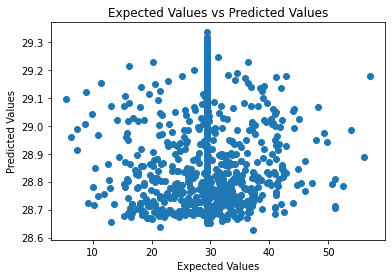

In [189]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test_CER, predicted_CER)

In [190]:
from sklearn import metrics
rmse_CER = np.sqrt(metrics.mean_squared_error(y_test_CER, predicted_CER))
print("Root mean squared error regression loss =", rmse_CER)
mape_CER = metrics.mean_absolute_percentage_error(y_test_CER, predicted_CER)
print("Mean absolute percentage error regression loss =", mape_CER)

Root mean squared error regression loss = 7.702159198659248
Mean absolute percentage error regression loss = 0.23590431964891861


#### For WCER

In [191]:
predicted_WCER = model_WCER.predict(x_test_WCER)
result_WCER = []
for i in y_test_WCER.keys():
    result_WCER.append(y_test_WCER[i])
x_WCER = pd.DataFrame({'Predicted Value': predicted_WCER, 'Expected Value': result_WCER})
x_WCER

,Predicted Value,Expected Value
0,14.429750,14.810000
1,16.499771,15.220000
2,14.777036,17.550000
3,14.175732,12.540000
4,15.130230,17.320000
...,...,...
727,14.618347,12.190000
728,17.484810,15.100000
729,16.225375,17.030000
730,17.811201,16.678604


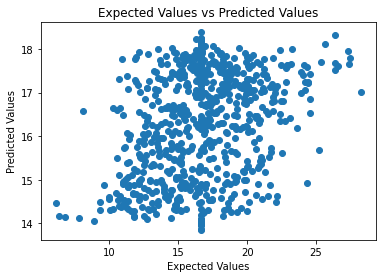

In [193]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test_WCER, predicted_WCER)

In [192]:
rmse_WCER = np.sqrt(metrics.mean_squared_error(y_test_WCER, predicted_WCER))
print("Root mean squared error regression loss =", rmse_WCER)
mape_WCER = metrics.mean_absolute_percentage_error(y_test_WCER, predicted_WCER)
print("Mean absolute percentage error regression loss =", mape_WCER)

Root mean squared error regression loss = 3.228172399905259
Mean absolute percentage error regression loss = 0.15802337505187466


## Rainfall Prediction:

In [165]:
rain_pre = []
for i in predicted_WCER:
    if i+rmse_WCER>20:
        rain_pre.append(1)
    else:
        rain_pre.append(0)

In [166]:
rain_ex = []
for i in y_test_WCER.keys():
    if y_test[i]>20:
        rain_ex.append(1)
    else:
        rain_ex.append(0)

In [167]:
rain = pd.DataFrame({'predicted': rain_pre, 'expected': rain_ex})
rain

,predicted,expected
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
727,0,0
728,1,0
729,0,0
730,1,0


In [176]:
i = 0
l = len(rain_ex)
count = 0
while(i<l):
    if rain_pre[i] == rain_ex[i]:
        count+=1
    i+=1
count

458

In [177]:
accuracy = count*100/l
print("prediction accuracy =", accuracy)

prediction accuracy = 62.568306010928964
